In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

In [12]:
file_path = r"C:\Users\dhrit\Downloads\test.csv"
df = pd.read_csv(file_path)


In [13]:
X = df.drop(['Activity', 'subject'], axis=1)
y = df['Activity']


In [4]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [7]:
y_pred = svm_model.predict(X_test)


In [8]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

✅ Accuracy: 0.9813559322033898

📋 Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       106
           SITTING       0.93      0.98      0.95       103
          STANDING       0.98      0.92      0.95        96
           WALKING       1.00      1.00      1.00        97
WALKING_DOWNSTAIRS       1.00      0.99      0.99        83
  WALKING_UPSTAIRS       0.99      1.00      1.00       105

          accuracy                           0.98       590
         macro avg       0.98      0.98      0.98       590
      weighted avg       0.98      0.98      0.98       590



C:\Users\dhrit\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


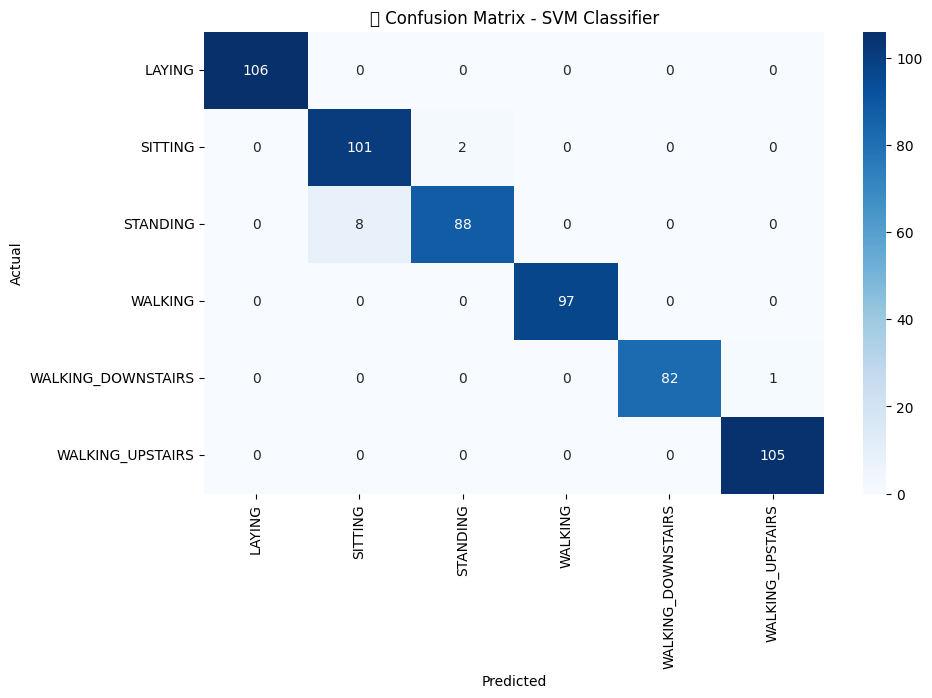

In [9]:
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("📊 Confusion Matrix - SVM Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

C:\Users\dhrit\AppData\Local\Temp\ipykernel_24104\2628812527.py:11: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhrit\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


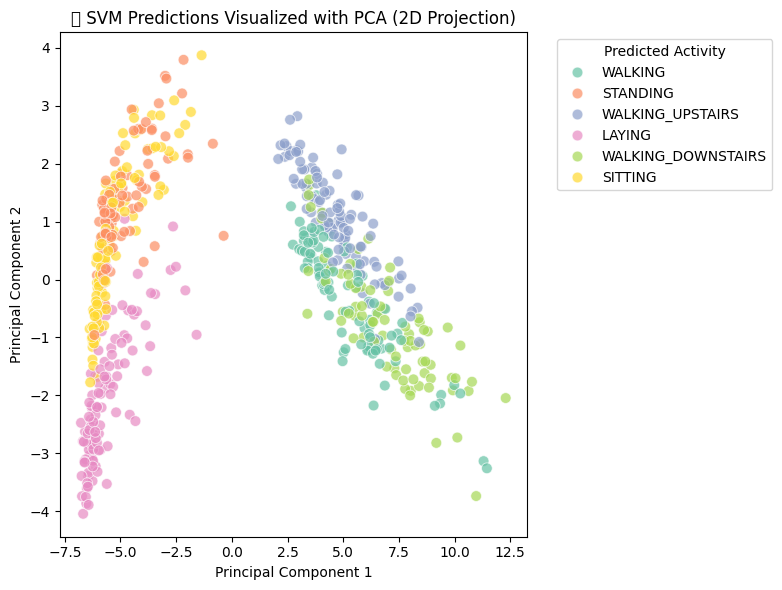

In [10]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=label_encoder.inverse_transform(y_pred),
                palette="Set2", alpha=0.7, s=60)
plt.title("🎨 SVM Predictions Visualized with PCA (2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Predicted Activity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\dhrit\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


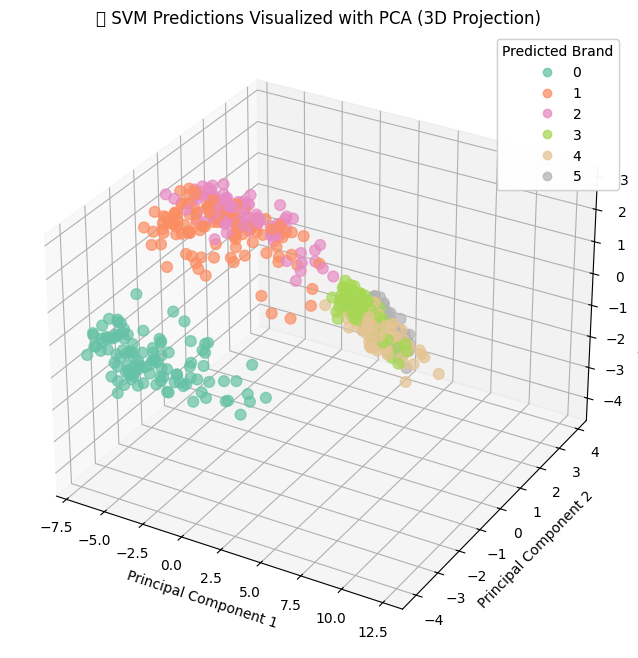

In [11]:
pca_3d = PCA(n_components=3)
X_reduced_3d = pca_3d.fit_transform(X_test)  # or X_test_3D if you already have 3 features

# Plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_reduced_3d[:, 0],
    X_reduced_3d[:, 1],
    X_reduced_3d[:, 2],
    c=y_pred, cmap='Set2',
    s=60,
    alpha=0.7
)

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("🎨 SVM Predictions Visualized with PCA (3D Projection)")

legend1 = ax.legend(*scatter.legend_elements(), title="Predicted Brand")
ax.add_artist(legend1)

plt.show()